# Importing libraries

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout, Average
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
import keras.backend as K

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preparation

### Unzipping the zip file

In [ ]:
!unzip -qq '/content/drive/My Drive/Internship Project/image-detect.zip'

### Extracting data from val_annotations.txt

In [ ]:
validation_data = pd.read_csv('val/val_annotations.txt', sep='\t', names=['FileName', 'Class', 'Col1', 'Col2', 'Col3', 'Col4'])
validation_data.drop(['Col1', 'Col2', 'Col3', 'Col4'], axis=1, inplace=True)

### Initializing Data Generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)  # For Training Data
validation_datagen = ImageDataGenerator(rescale=1./255)  # For Validation Data

### Getting Data from Generator

In [ ]:
# For Training Data
training_data_generator = train_datagen.flow_from_directory('train', target_size=(128,128), color_mode='rgb', batch_size=64, class_mode='categorical', shuffle=True, seed=10)

# For Validation Data
validation_data_generator = validation_datagen.flow_from_dataframe(validation_data, directory='val/images', x_col='FileName', y_col='Class', target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=10)

Found 90000 images belonging to 200 classes.
Found 10000 validated image filenames belonging to 200 classes.


# Model Creation

### Creating the Structure

In [ ]:
# Inspired from VGG16 Architecture

img_channels = 3  # For RGB

input = Input(shape=(128, 128, img_channels))

# Layer 1 - CONV: kernels=64, kernelsize=(3,3), strides=(1,1), ReLU Activation
layer1 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV1")(input)
layer1 = BatchNormalization(name="BN1")(layer1)
layer1 = Activation("relu")(layer1)

# Layer 2 - CONV: kernels=64, kernelsize=(3,3), strides=(1,1), ReLU Activation
layer2 = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV2")(layer1)
layer2 = BatchNormalization(name="BN2")(layer2)
layer2 = Activation("relu")(layer2)

# Layer 3 - MaxPool: pool_size=(2,2)
layer3 = MaxPooling2D(pool_size=(2,2), strides=2)(layer2)

# Layer 4 - CONV: kernels=128, kernelsize=(3,3), ReLU Activation
layer4 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV3")(layer3)
layer4 = BatchNormalization(name="BN3")(layer4)
layer4 = Activation("relu")(layer4)

# Layer 5 - CONV: kernels=128, kernelsize=(3,3), ReLU Activation
layer5 = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV4")(layer4)
layer5 = BatchNormalization(name="BN4")(layer5)
layer5 = Activation("relu")(layer5)

# Layer 6 - MaxPool: pool_size=(2,2)
layer6 = MaxPooling2D(pool_size=(2,2), strides=2)(layer5)

# Layer 7 - CONV: kernels=256, kernelsize=(3,3), ReLU Activation
layer7 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV5")(layer6)
layer7 = BatchNormalization(name="BN5")(layer7)
layer7 = Activation("relu")(layer7)

# Layer 8 - CONV: kernels=256, kernelsize=(3,3), ReLU Activation
layer8 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV6")(layer7)
layer8 = BatchNormalization(name="BN6")(layer8)
layer8 = Activation("relu")(layer8)

# Layer 9 - CONV: kernels=256, kernelsize=(3,3), ReLU Activation
layer9 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV7")(layer8)
layer9 = BatchNormalization(name="BN7")(layer9)
layer9 = Activation("relu")(layer9)

# Layer 10 - MaxPool: pool_size=(2,2)
layer10 = MaxPooling2D(pool_size=(2,2), strides=2)(layer9)

# Layer 11 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer11 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV8")(layer10)
layer11 = BatchNormalization(name="BN8")(layer11)
layer11 = Activation("relu")(layer11)

# Layer 12 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer12 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV9")(layer11)
layer12 = BatchNormalization(name="BN9")(layer12)
layer12 = Activation("relu")(layer12)

# Layer 13 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer13 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV10")(layer12)
layer13 = BatchNormalization(name="BN10")(layer13)
layer13 = Activation("relu")(layer13)

# Layer 14 - MaxPool: pool_size=(2,2)
layer14 = MaxPooling2D(pool_size=(2,2), strides=2)(layer13)

# Layer 15 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer15 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV11")(layer14)
layer15 = BatchNormalization(name="BN11")(layer15)
layer15 = Activation("relu")(layer15)

# Layer 16 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer16 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV12")(layer15)
layer16 = BatchNormalization(name="BN12")(layer16)
layer16 = Activation("relu")(layer16)

# Layer 17 - CONV: kernels=512, kernelsize=(3,3), ReLU Activation
layer17 = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same", name="CONV13")(layer16)
layer17 = BatchNormalization(name="BN13")(layer17)
layer17 = Activation("relu")(layer17)

# Layer 18 - MaxPool: pool_size=(2,2)
layer18 = MaxPooling2D(pool_size=(2,2), strides=2)(layer17)

# Layer 19 - Flattening
layer19 = Flatten()(layer18)

# Layer 20 - FC: units=4096
layer20 = Dense(units=4096, activation="relu")(layer19)

# Layer 21 - Dropout 0.5
layer21 = Dropout(0.5)(layer20)

# Layer 22 - FC: units=512
layer22 = Dense(units=512, activation="relu")(layer21)

# Layer 23 - FC: units=200
layer23 = Dense(units=200, activation="softmax")(layer22)

output = layer23

### Creating the Model

In [ ]:
model = Model(inputs=input, outputs=output)

# Printing the model's architecture
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 128, 128, 64)      1792      
_________________________________________________________________
BN1 (BatchNormalization)     (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 128, 128, 64)      36928     
_________________________________________________________________
BN2 (BatchNormalization)     (None, 128, 128, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 64)      0   

### Defining Evaluation Metrics

In [ ]:
def f1_score(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

def categorical_accuracy(y_true, y_pred):
  return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))

### Defining Optimizer and Callback

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)  # Optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)  # Callback

### Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[f1_score, categorical_accuracy])

# Function for plotting F1-Score and Loss v/s Epochs

In [ ]:
def my_plot(his):
  f1_score_y_axis = his.history['f1_score']
  val_f1_score_y_axis = his.history['val_f1_score']

  loss_y_axis = his.history['loss']
  val_loss_y_axis = his.history['val_loss']

  epochs = range(1, len(f1_score_y_axis) + 1)

  plt.plot(epochs, f1_score_y_axis, label='f1_score')
  plt.plot(epochs, val_f1_score_y_axis, label='val_f1_score')
  plt.title('Training and Validation F1-Score v/s Epochs')
  plt.ylabel('F1-Score')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss_y_axis, label ='loss')
  plt.plot(epochs, val_loss_y_axis, label='val_loss')
  plt.title('Training and Validaiton Loss v/s Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.show()

# Image Augmentations

## Image Augmentation 1

In [ ]:
def image_augmentation1():
  global train_datagen
  global training_data_generator

  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )

  # We do not augment images in Validation Data
  training_data_generator = train_datagen.flow_from_directory('train', target_size=(128,128), color_mode='rgb', batch_size=64, class_mode='categorical', shuffle=True, seed=10)

## Image Augmentation 2

In [ ]:
def image_augmentation2():
  import imgaug
  from imgaug import augmenters as iaa
  imgaug.seed(10)

  global train_datagen
  global training_data_generator

  seq = iaa.SomeOf((0, 6),
                   [
                    iaa.Fliplr(0.5),  # horizontally flip 50% of all images
                    iaa.Crop(px=(0,4)),  # crop images from each side by 0 to 4px (randomly chosen)
                    iaa.GaussianBlur(sigma=(0, 2.5)),
                    iaa.LinearContrast((0.75, 1.25)),  # Changing the contrast in each image
                    iaa.AdditiveGaussianNoise(scale=(0.0, 0.05*255)),
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        rotate=(-20, 20)
                    ),
                    iaa.CoarseDropout(
                        (0.03, 0.15),
                        size_percent=(0.02, 0.05),
                        per_channel=0.2
                    )
                  ])

  train_datagen = ImageDataGenerator(preprocessing_function=seq.augment_image, rescale=1./255)
  training_data_generator = train_datagen.flow_from_directory('train', target_size=(128,128), color_mode='rgb', batch_size=64, class_mode='categorical', shuffle=True, seed=10)

## Function to display some images

In [ ]:
def display_some_augmented_images():
  import os
  from keras.preprocessing import image

  img_path = 'train/n01443537/images/n01443537_96.JPEG'
  img = image.load_img(img_path, target_size=(64, 64))

  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)

  i=0
  for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
      break

  plt.show()

# Training the Model

## Stage 1 - Using Original Data

*   Size of each image = (128, 128)
*   Batch Size = 64
*   Epochs = 24



#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/4
1407/1407 [==============================] - 1545s 1s/step - loss: 4.9837 - f1_score: 8.2935e-04 - categorical_accuracy: 0.0324 - val_loss: 4.3599 - val_f1_score: 0.0062 - val_categorical_accuracy: 0.0782
Epoch 2/4
1407/1407 [==============================] - 1533s 1s/step - loss: 4.2236 - f1_score: 0.0175 - categorical_accuracy: 0.1057 - val_loss: 3.8721 - val_f1_score: 0.0251 - val_categorical_accuracy: 0.1319
Epoch 3/4
1407/1407 [==============================] - 1534s 1s/step - loss: 3.7294 - f1_score: 0.0576 - categorical_accuracy: 0.1736 - val_loss: 3.5868 - val_f1_score: 0.0797 - val_categorical_accuracy: 0.2021
Epoch 4/4
1407/1407 [==============================] - 1539s 1s/step - loss: 3.3929 - f1_score: 0.1088 - categorical_accuracy: 0.2287 - val_loss: 3.1137 - val_f1_score: 0.1123 - val_categorical_accuracy: 0.2407


#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_1_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

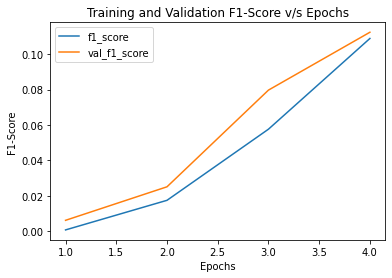

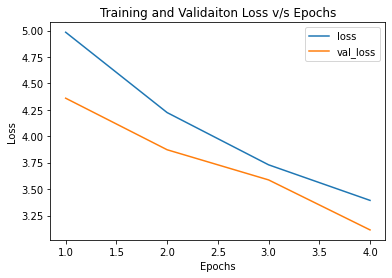

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/4
1407/1407 [==============================] - 1541s 1s/step - loss: 3.1291 - f1_score: 0.1606 - categorical_accuracy: 0.2733 - val_loss: 2.7731 - val_f1_score: 0.1542 - val_categorical_accuracy: 0.2661
Epoch 2/4
1407/1407 [==============================] - 1541s 1s/step - loss: 2.8988 - f1_score: 0.2130 - categorical_accuracy: 0.3151 - val_loss: 3.5337 - val_f1_score: 0.2150 - val_categorical_accuracy: 0.2969
Epoch 3/4
1407/1407 [==============================] - 1540s 1s/step - loss: 2.6904 - f1_score: 0.2665 - categorical_accuracy: 0.3549 - val_loss: 2.3900 - val_f1_score: 0.2207 - val_categorical_accuracy: 0.3027
Epoch 4/4
1407/1407 [==============================] - 1541s 1s/step - loss: 2.4951 - f1_score: 0.3179 - categorical_accuracy: 0.3919 - val_loss: 2.8664 - val_f1_score: 0.2796 - val_categorical_accuracy: 0.3428


#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_2_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

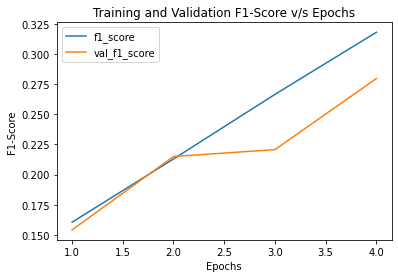

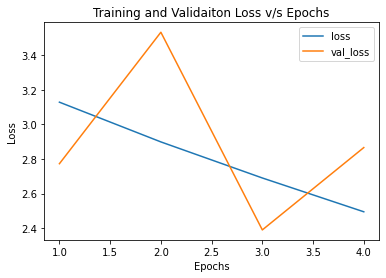

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/8
1407/1407 [==============================] - 1542s 1s/step - loss: 2.3189 - f1_score: 0.3631 - categorical_accuracy: 0.4275 - val_loss: 2.2265 - val_f1_score: 0.2843 - val_categorical_accuracy: 0.3384
Epoch 2/8
1407/1407 [==============================] - 1542s 1s/step - loss: 2.1391 - f1_score: 0.4100 - categorical_accuracy: 0.4637 - val_loss: 3.8136 - val_f1_score: 0.3221 - val_categorical_accuracy: 0.3636
Epoch 3/8
1407/1407 [==============================] - 1541s 1s/step - loss: 1.9628 - f1_score: 0.4574 - categorical_accuracy: 0.5005 - val_loss: 2.4065 - val_f1_score: 0.3459 - val_categorical_accuracy: 0.3776
Epoch 4/8
1407/1407 [==============================] - 1541s 1s/step - loss: 1.7969 - f1_score: 0.5001 - categorical_accuracy: 0.5358 - val_loss: 3.0625 - val_f1_score: 0.3530 - val_categorical_accuracy: 0.3653

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/8
1407/1407 [==============================] - 1543s 1s/step - los

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_3_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

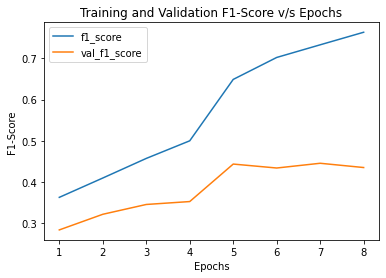

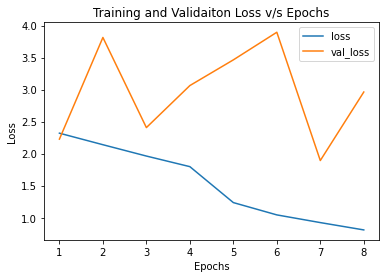

In [ ]:
my_plot(his)

#### Decreasing Learning Rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-6)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/8
1407/1407 [==============================] - 440s 313ms/step - loss: 0.6851 - f1_score: 0.7972 - categorical_accuracy: 0.8158 - val_loss: 2.6833 - val_f1_score: 0.4550 - val_categorical_accuracy: 0.4451
Epoch 2/8
1407/1407 [==============================] - 429s 305ms/step - loss: 0.6531 - f1_score: 0.8074 - categorical_accuracy: 0.8278 - val_loss: 2.5127 - val_f1_score: 0.4569 - val_categorical_accuracy: 0.4508
Epoch 3/8
1407/1407 [==============================] - 429s 305ms/step - loss: 0.6388 - f1_score: 0.8121 - categorical_accuracy: 0.8312 - val_loss: 1.7470 - val_f1_score: 0.4591 - val_categorical_accuracy: 0.4524
Epoch 4/8
1407/1407 [==============================] - 429s 305ms/step - loss: 0.6322 - f1_score: 0.8154 - categorical_accuracy: 0.8350 - val_loss: 2.3139 - val_f1_score: 0.4599 - val_categorical_accuracy: 0.4541
Epoch 5/8
1407/1407 [==============================] - 429s 305ms/step - loss: 0.6292 - f1_score: 0.8159 - categorical_accuracy: 0.8366 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_4_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

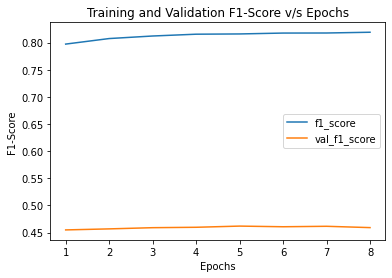

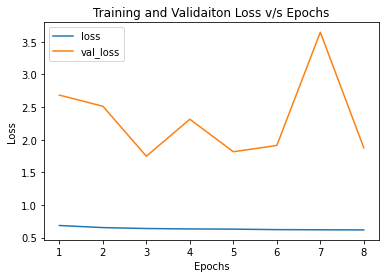

In [ ]:
my_plot(his)

## Stage 2 - Using Image Augmentation 1

*   Size of each image = (128, 128)
*   Batch size = 64
*   Epochs = 24



#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


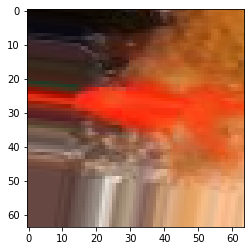

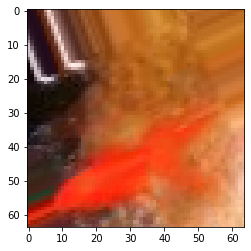

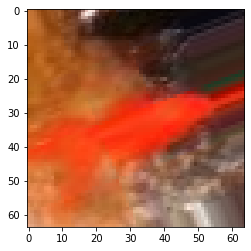

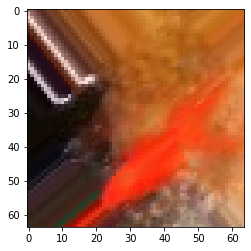

In [ ]:
# Using Image Augmentation 1
image_augmentation1()
display_some_augmented_images()

#### Loading Previous Model

In [ ]:
model = load_model("/content/drive/My Drive/Internship Project/Models/model_4_epochs8.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})

#### Change Learning Rate and Modifying Callback

In [ ]:
K.set_value(model.optimizer.lr, 1e-4) # Optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-14, verbose=1)  # Callback

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/8
1407/1407 [==============================] - 495s 352ms/step - loss: 2.9792 - f1_score: 0.2545 - categorical_accuracy: 0.3137 - val_loss: 2.1032 - val_f1_score: 0.3017 - val_categorical_accuracy: 0.3182
Epoch 2/8
1407/1407 [==============================] - 491s 349ms/step - loss: 2.7904 - f1_score: 0.2737 - categorical_accuracy: 0.3412 - val_loss: 2.9635 - val_f1_score: 0.2854 - val_categorical_accuracy: 0.2996
Epoch 3/8
1407/1407 [==============================] - 490s 349ms/step - loss: 2.7272 - f1_score: 0.2838 - categorical_accuracy: 0.3523 - val_loss: 3.1365 - val_f1_score: 0.3072 - val_categorical_accuracy: 0.3238
Epoch 4/8
1407/1407 [==============================] - 492s 349ms/step - loss: 2.6693 - f1_score: 0.2975 - categorical_accuracy: 0.3642 - val_loss: 3.0420 - val_f1_score: 0.3159 - val_categorical_accuracy: 0.3348
Epoch 5/8
1407/1407 [==============================] - 492s 350ms/step - loss: 2.6313 - f1_score: 0.3052 - categorical_accuracy: 0.3698 - val_loss: 

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 494s 351ms/step - loss: 2.5427 - f1_score: 0.3248 - categorical_accuracy: 0.3851 - val_loss: 3.1259 - val_f1_score: 0.3483 - val_categorical_accuracy: 0.3592
Epoch 2/8
1407/1407 [==============================] - 488s 347ms/step - loss: 2.5309 - f1_score: 0.3300 - categorical_accuracy: 0.3897 - val_loss: 4.2754 - val_f1_score: 0.3479 - val_categorical_accuracy: 0.3604
Epoch 3/8
1407/1407 [==============================] - 494s 351ms/step - loss: 2.5224 - f1_score: 0.3306 - categorical_accuracy: 0.3905 - val_loss: 2.5517 - val_f1_score: 0.3441 - val_categorical_accuracy: 0.3588
Epoch 4/8
1407/1407 [==============================] - 491s 349ms/step - loss: 2.5157 - f1_score: 0.3327 - categorical_accuracy: 0.3929 - val_loss: 2.8440 - val_f1_score: 0.3533 - val_categorical_accuracy: 0.3673
Epoch 5/8
1407/1407 [==============================] - 489s 348ms/step - loss: 2.5014 - f1_score: 0.3361 - categorical_accuracy: 0.3952 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_5_epochs16.h5")

#### Plotting F1-Score and Loss v/s Epochs

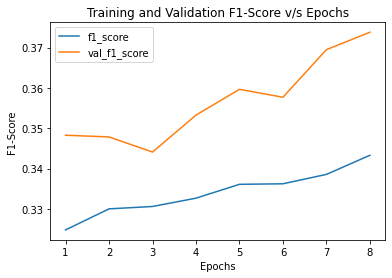

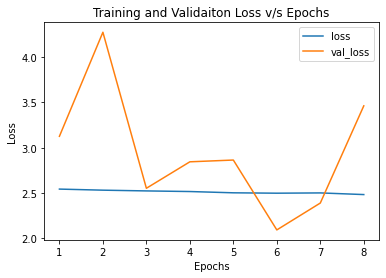

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 491s 349ms/step - loss: 2.4853 - f1_score: 0.3407 - categorical_accuracy: 0.3973 - val_loss: 3.5315 - val_f1_score: 0.3814 - val_categorical_accuracy: 0.3964
Epoch 2/8
1407/1407 [==============================] - 488s 347ms/step - loss: 2.4679 - f1_score: 0.3454 - categorical_accuracy: 0.4017 - val_loss: 4.0982 - val_f1_score: 0.3664 - val_categorical_accuracy: 0.3777
Epoch 3/8
1407/1407 [==============================] - 488s 347ms/step - loss: 2.4720 - f1_score: 0.3429 - categorical_accuracy: 0.4020 - val_loss: 3.0072 - val_f1_score: 0.3534 - val_categorical_accuracy: 0.3643
Epoch 4/8
1407/1407 [==============================] - 489s 347ms/step - loss: 2.4633 - f1_score: 0.3467 - categorical_accuracy: 0.4033 - val_loss: 2.0370 - val_f1_score: 0.3714 - val_categorical_accuracy: 0.3831
Epoch 5/8
1407/1407 [==============================] - 489s 347ms/step - loss: 2.4565 - f1_score: 0.3480 - categorical_accuracy: 0.4049 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_6_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

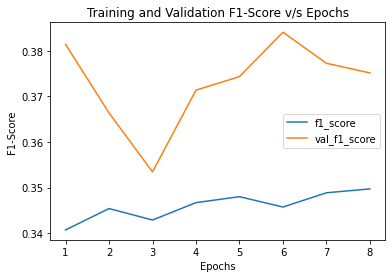

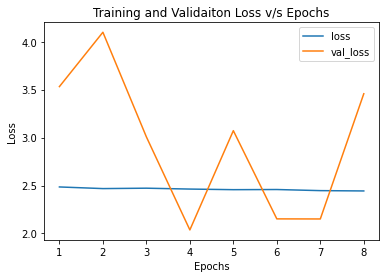

In [ ]:
my_plot(his)

## Stage 3 - Using Image Augmentation 2

*   Size of each image = (128, 128)
*   Batch size = 64
*   Epochs = 24



#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


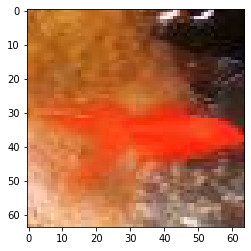

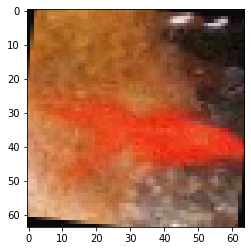

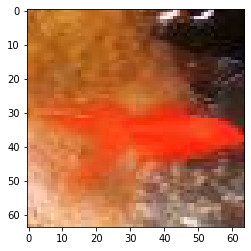

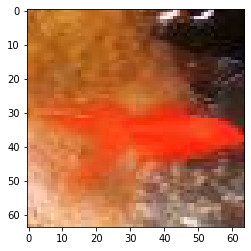

In [ ]:
# Using Image Augmentation 2
image_augmentation2()
display_some_augmented_images()

#### Loading Previous Model

In [ ]:
model = load_model("/content/drive/My Drive/Internship Project/Models/model_6_epochs8.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})

#### Changing Learning Rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-4) # Optimizer

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, callbacks=[reduce_lr], verbose=1)

Epoch 1/8
1407/1407 [==============================] - 612s 435ms/step - loss: 2.3762 - f1_score: 0.3896 - categorical_accuracy: 0.4380 - val_loss: 3.0034 - val_f1_score: 0.4498 - val_categorical_accuracy: 0.4591
Epoch 2/8
1407/1407 [==============================] - 610s 433ms/step - loss: 2.1614 - f1_score: 0.4321 - categorical_accuracy: 0.4748 - val_loss: 3.4550 - val_f1_score: 0.4563 - val_categorical_accuracy: 0.4594
Epoch 3/8
1407/1407 [==============================] - 607s 431ms/step - loss: 2.0806 - f1_score: 0.4540 - categorical_accuracy: 0.4928 - val_loss: 2.0705 - val_f1_score: 0.4654 - val_categorical_accuracy: 0.4659
Epoch 4/8
1407/1407 [==============================] - 594s 422ms/step - loss: 2.0270 - f1_score: 0.4677 - categorical_accuracy: 0.5012 - val_loss: 2.6434 - val_f1_score: 0.4689 - val_categorical_accuracy: 0.4686
Epoch 5/8
1407/1407 [==============================] - 590s 420ms/step - loss: 1.9907 - f1_score: 0.4750 - categorical_accuracy: 0.5078 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_7_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

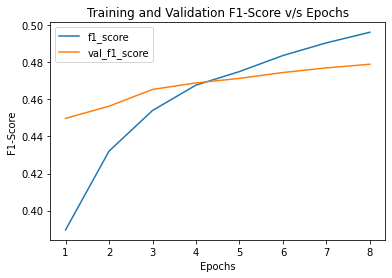

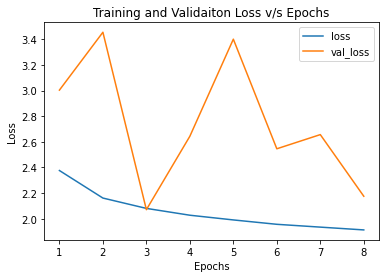

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 598s 425ms/step - loss: 1.9480 - f1_score: 0.4875 - categorical_accuracy: 0.5180 - val_loss: 2.2418 - val_f1_score: 0.4633 - val_categorical_accuracy: 0.4578
Epoch 2/8
1407/1407 [==============================] - 590s 419ms/step - loss: 1.8865 - f1_score: 0.5057 - categorical_accuracy: 0.5309 - val_loss: 1.9330 - val_f1_score: 0.4670 - val_categorical_accuracy: 0.4626
Epoch 3/8
1407/1407 [==============================] - 592s 421ms/step - loss: 1.8444 - f1_score: 0.5142 - categorical_accuracy: 0.5399 - val_loss: 2.3276 - val_f1_score: 0.4699 - val_categorical_accuracy: 0.4613
Epoch 4/8
1407/1407 [==============================] - 588s 418ms/step - loss: 1.8077 - f1_score: 0.5230 - categorical_accuracy: 0.5463 - val_loss: 2.8729 - val_f1_score: 0.4709 - val_categorical_accuracy: 0.4622
Epoch 5/8
1407/1407 [==============================] - 589s 418ms/step - loss: 1.7801 - f1_score: 0.5318 - categorical_accuracy: 0.5540 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_8_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

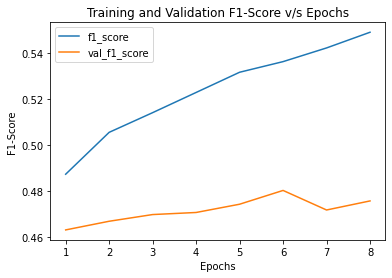

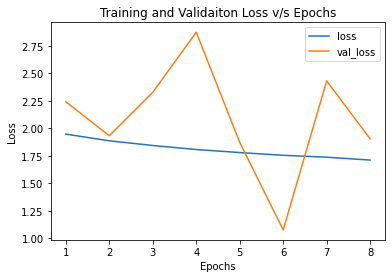

In [ ]:
my_plot(his)

#### Decreasing Learning Rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-5) # Optimizer

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 594s 422ms/step - loss: 1.6420 - f1_score: 0.5642 - categorical_accuracy: 0.5832 - val_loss: 2.2347 - val_f1_score: 0.4945 - val_categorical_accuracy: 0.4893
Epoch 2/8
1407/1407 [==============================] - 598s 425ms/step - loss: 1.6195 - f1_score: 0.5714 - categorical_accuracy: 0.5914 - val_loss: 1.7109 - val_f1_score: 0.4987 - val_categorical_accuracy: 0.4897
Epoch 3/8
1407/1407 [==============================] - 612s 435ms/step - loss: 1.6093 - f1_score: 0.5749 - categorical_accuracy: 0.5924 - val_loss: 2.1635 - val_f1_score: 0.4979 - val_categorical_accuracy: 0.4897
Epoch 4/8
1407/1407 [==============================] - 616s 438ms/step - loss: 1.6080 - f1_score: 0.5777 - categorical_accuracy: 0.5934 - val_loss: 2.6233 - val_f1_score: 0.4975 - val_categorical_accuracy: 0.4877
Epoch 5/8
1407/1407 [==============================] - 622s 442ms/step - loss: 1.6051 - f1_score: 0.5782 - categorical_accuracy: 0.5946 - val_loss: 

#### Saving the Model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/model_9_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

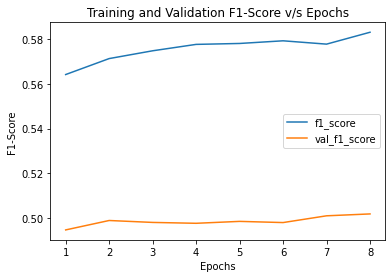

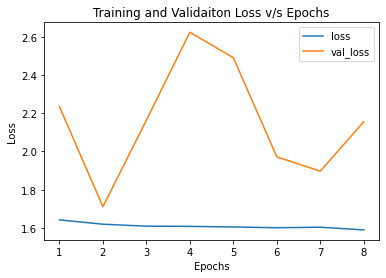

In [ ]:
my_plot(his)

# Transfer Learning using Xception ImageNet Weights
*   Size of each image = (128, 128)
*   Batch size = 64
*   Epochs = 12

#### Importing the convolution base and creating the model

In [ ]:
from keras.applications import Xception
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adadelta

base_model = Xception(include_top=False, weights="imagenet", input_shape=(128,128,3))
h = base_model.output
h = GlobalAveragePooling2D()(h)
output = Dense(units=200, activation="softmax")(h)

model = Model(inputs=[base_model.input], outputs=[output])

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=[f1_score, categorical_accuracy])
model.summary()

83689472/83683744 [==============================] - 7s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
___________________________

#### Loading Validation Data

In [ ]:
# For Validation Data
validation_data_generator = validation_datagen.flow_from_dataframe(validation_data, directory='val/images', x_col='FileName', y_col='Class', target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=10)

Found 10000 validated image filenames belonging to 200 classes.


#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


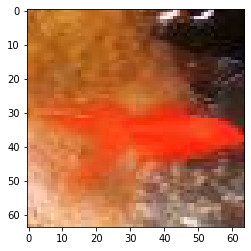

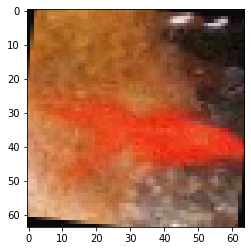

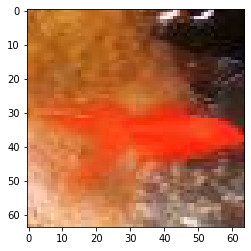

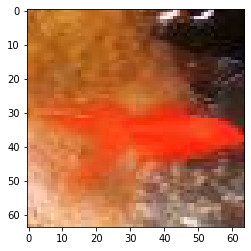

In [ ]:
# Using Image Augmentation 2
image_augmentation2()
display_some_augmented_images()

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 1608s 1s/step - loss: 2.3766 - f1_score: 0.4194 - categorical_accuracy: 0.4477 - val_loss: 2.4278 - val_f1_score: 0.5390 - val_categorical_accuracy: 0.5319
Epoch 2/8
1407/1407 [==============================] - 1582s 1s/step - loss: 1.6484 - f1_score: 0.5906 - categorical_accuracy: 0.5883 - val_loss: 1.6726 - val_f1_score: 0.5895 - val_categorical_accuracy: 0.5799
Epoch 3/8
1407/1407 [==============================] - 1583s 1s/step - loss: 1.3680 - f1_score: 0.6580 - categorical_accuracy: 0.6506 - val_loss: 0.8879 - val_f1_score: 0.6215 - val_categorical_accuracy: 0.6070
Epoch 4/8
1407/1407 [==============================] - 1583s 1s/step - loss: 1.1751 - f1_score: 0.7017 - categorical_accuracy: 0.6925 - val_loss: 1.8066 - val_f1_score: 0.6457 - val_categorical_accuracy: 0.6236
Epoch 5/8
1407/1407 [==============================] - 1582s 1s/step - loss: 1.0302 - f1_score: 0.7352 - categorical_accuracy: 0.7254 - val_loss: 0.8405 - v

#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/Xception_1_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epcohs

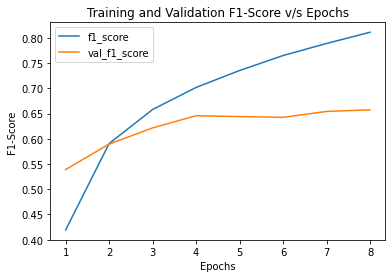

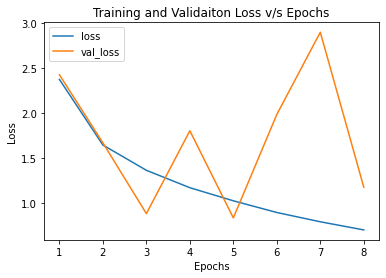

In [ ]:
my_plot(his)

#### Decreasing the learning rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-4)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 1583s 1s/step - loss: 0.5428 - f1_score: 0.8504 - categorical_accuracy: 0.8480 - val_loss: 1.2028 - val_f1_score: 0.6906 - val_categorical_accuracy: 0.6716
Epoch 2/4
1407/1407 [==============================] - 1585s 1s/step - loss: 0.5397 - f1_score: 0.8511 - categorical_accuracy: 0.8493 - val_loss: 0.5792 - val_f1_score: 0.6916 - val_categorical_accuracy: 0.6719
Epoch 3/4
1407/1407 [==============================] - 1587s 1s/step - loss: 0.5404 - f1_score: 0.8515 - categorical_accuracy: 0.8492 - val_loss: 1.8780 - val_f1_score: 0.6915 - val_categorical_accuracy: 0.6719
Epoch 4/4
1407/1407 [==============================] - 1586s 1s/step - loss: 0.5362 - f1_score: 0.8516 - categorical_accuracy: 0.8509 - val_loss: 1.4777 - val_f1_score: 0.6921 - val_categorical_accuracy: 0.6727


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/Xception_2_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

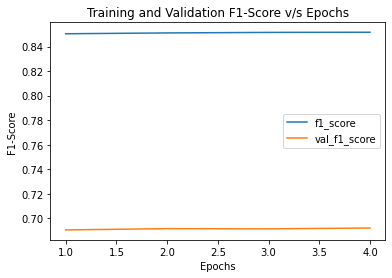

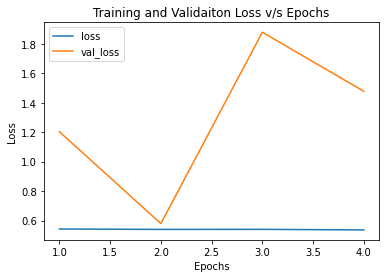

In [ ]:
my_plot(his)

# Transfer Learning using InceptionResNetV2 ImageNet Weights
*    Size of each image = (128, 128)
*    Batch size = 64
*    Epochs = 16

#### Importing the convolution base and creating the model

In [ ]:
from keras.applications import InceptionResNetV2
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adadelta


base_model = InceptionResNetV2(include_top=False, weights="imagenet", input_shape=(128,128,3))
h = base_model.output
h = GlobalAveragePooling2D()(h)
output = Dense(units=200, activation="softmax")(h)

model = Model(inputs=[base_model.input], outputs=[output])

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=[f1_score, categorical_accuracy])
model.summary()

219062272/219055592 [==============================] - 16s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 63, 63, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 63, 63, 32)   0           batch_normalization_1[0][0]      
________________________

#### Loading Validation Data

In [ ]:
# For Validation Data
validation_data_generator = validation_datagen.flow_from_dataframe(validation_data, directory='val/images', x_col='FileName', y_col='Class', target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=10)

Found 10000 validated image filenames belonging to 200 classes.


#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


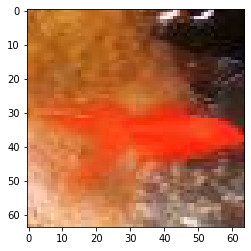

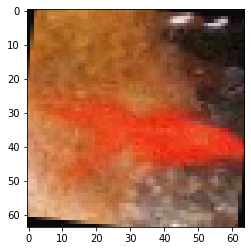

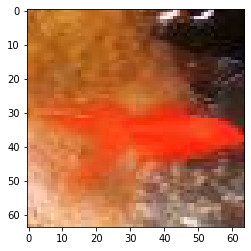

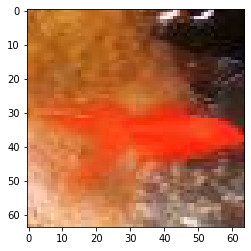

In [ ]:
# Using Image Augmentation 2
image_augmentation2()
display_some_augmented_images()

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 1956s 1s/step - loss: 2.6320 - f1_score: 0.3468 - categorical_accuracy: 0.3902 - val_loss: 2.6481 - val_f1_score: 0.4794 - val_categorical_accuracy: 0.4929
Epoch 2/8
1407/1407 [==============================] - 1868s 1s/step - loss: 1.8931 - f1_score: 0.5212 - categorical_accuracy: 0.5320 - val_loss: 2.6178 - val_f1_score: 0.5086 - val_categorical_accuracy: 0.5000
Epoch 3/8
1407/1407 [==============================] - 1869s 1s/step - loss: 1.5905 - f1_score: 0.5971 - categorical_accuracy: 0.5974 - val_loss: 2.0026 - val_f1_score: 0.5548 - val_categorical_accuracy: 0.5438
Epoch 4/8
1407/1407 [==============================] - 1860s 1s/step - loss: 1.3528 - f1_score: 0.6530 - categorical_accuracy: 0.6496 - val_loss: 0.8843 - val_f1_score: 0.5875 - val_categorical_accuracy: 0.5698
Epoch 5/8
1407/1407 [==============================] - 1857s 1s/step - loss: 1.1756 - f1_score: 0.6960 - categorical_accuracy: 0.6894 - val_loss: 1.0983 - v

#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/InceptionResNetV2_1_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

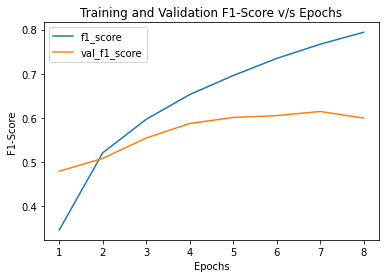

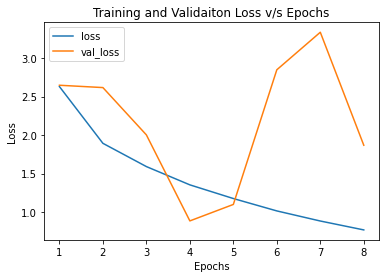

In [ ]:
my_plot(his)

#### Decreasing the learning rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-4)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 1873s 1s/step - loss: 0.6697 - f1_score: 0.8193 - categorical_accuracy: 0.8117 - val_loss: 1.7691 - val_f1_score: 0.6222 - val_categorical_accuracy: 0.5993
Epoch 2/4
1407/1407 [==============================] - 1869s 1s/step - loss: 0.5918 - f1_score: 0.8398 - categorical_accuracy: 0.8340 - val_loss: 1.5458 - val_f1_score: 0.6211 - val_categorical_accuracy: 0.6001
Epoch 3/4
1407/1407 [==============================] - 1861s 1s/step - loss: 0.5165 - f1_score: 0.8581 - categorical_accuracy: 0.8520 - val_loss: 2.1342 - val_f1_score: 0.5733 - val_categorical_accuracy: 0.5535
Epoch 4/4
1407/1407 [==============================] - 1865s 1s/step - loss: 0.4658 - f1_score: 0.8718 - categorical_accuracy: 0.8663 - val_loss: 2.5184 - val_f1_score: 0.6338 - val_categorical_accuracy: 0.6148


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/InceptionResNetV2_2_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

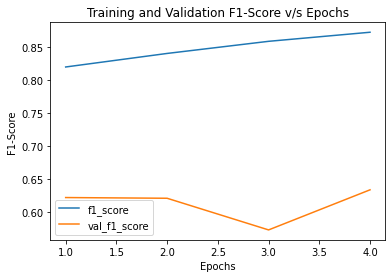

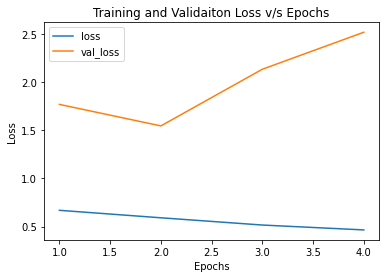

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 1924s 1s/step - loss: 0.3700 - f1_score: 0.8966 - categorical_accuracy: 0.8933 - val_loss: 2.9483 - val_f1_score: 0.6485 - val_categorical_accuracy: 0.6291
Epoch 2/4
1407/1407 [==============================] - 1820s 1s/step - loss: 0.3632 - f1_score: 0.8983 - categorical_accuracy: 0.8961 - val_loss: 2.6975 - val_f1_score: 0.6499 - val_categorical_accuracy: 0.6299
Epoch 3/4
1407/1407 [==============================] - 1833s 1s/step - loss: 0.3639 - f1_score: 0.8990 - categorical_accuracy: 0.8963 - val_loss: 1.8291 - val_f1_score: 0.6495 - val_categorical_accuracy: 0.6307
Epoch 4/4
1407/1407 [==============================] - 1837s 1s/step - loss: 0.3580 - f1_score: 0.9001 - categorical_accuracy: 0.8974 - val_loss: 1.3072 - val_f1_score: 0.6508 - val_categorical_accuracy: 0.6319


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/InceptionResNetV2_3_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

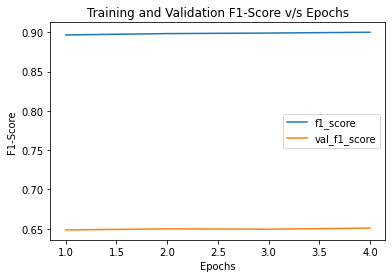

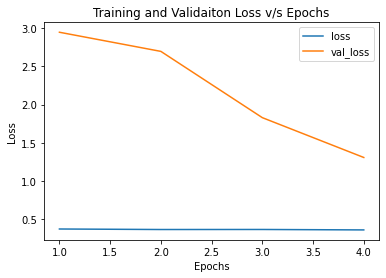

In [ ]:
my_plot(his)

# Transfer Learning using MobileNetV2 ImageNet Weights
*    Size of each image = (128, 128)
*    Batch size = 64
*    Epochs = 28 (Including 4 epochs for Fine-tuning)

#### Importing the convolution base and creating the model

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adadelta


base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape=(128,128,3))
h = base_model.output
h = GlobalAveragePooling2D()(h)
output = Dense(units=200, activation="softmax")(h)

model = Model(inputs=[base_model.input], outputs=[output])

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=[f1_score, categorical_accuracy])
model.summary()

9412608/9406464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_____________________________

#### Loading Validation Data

In [ ]:
# For Validation Data
validation_data_generator = validation_datagen.flow_from_dataframe(validation_data, directory='val/images', x_col='FileName', y_col='Class', target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=10)

Found 10000 validated image filenames belonging to 200 classes.


#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


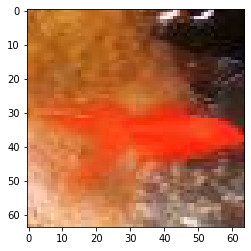

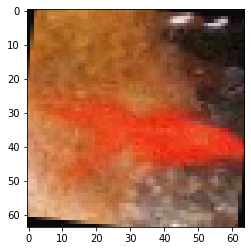

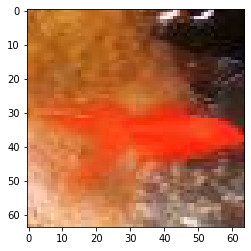

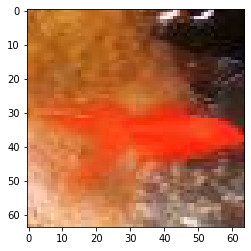

In [ ]:
# Using Image Augmentation 2
image_augmentation2()
display_some_augmented_images()

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 883s 628ms/step - loss: 3.0173 - f1_score: 0.2406 - categorical_accuracy: 0.3073 - val_loss: 11.7397 - val_f1_score: 0.0164 - val_categorical_accuracy: 0.0169
Epoch 2/8
1407/1407 [==============================] - 852s 606ms/step - loss: 2.3245 - f1_score: 0.3983 - categorical_accuracy: 0.4359 - val_loss: 9.1230 - val_f1_score: 0.0536 - val_categorical_accuracy: 0.0599
Epoch 3/8
1407/1407 [==============================] - 848s 603ms/step - loss: 2.0484 - f1_score: 0.4710 - categorical_accuracy: 0.4925 - val_loss: 6.6012 - val_f1_score: 0.1549 - val_categorical_accuracy: 0.1512
Epoch 4/8
1407/1407 [==============================] - 854s 607ms/step - loss: 1.8744 - f1_score: 0.5173 - categorical_accuracy: 0.5293 - val_loss: 5.1103 - val_f1_score: 0.1634 - val_categorical_accuracy: 0.1751
Epoch 5/8
1407/1407 [==============================] - 861s 612ms/step - loss: 1.7313 - f1_score: 0.5553 - categorical_accuracy: 0.5614 - val_loss:

#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/MobileNetV2_1_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

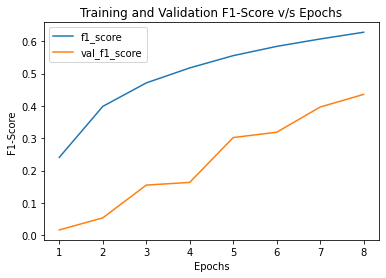

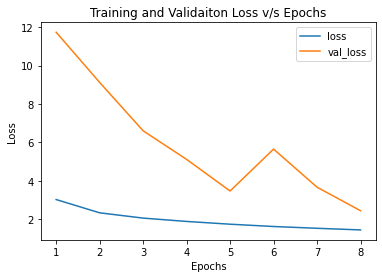

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=8, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/8
1407/1407 [==============================] - 874s 621ms/step - loss: 1.3580 - f1_score: 0.6483 - categorical_accuracy: 0.6424 - val_loss: 2.7962 - val_f1_score: 0.4705 - val_categorical_accuracy: 0.4542
Epoch 2/8
1407/1407 [==============================] - 866s 616ms/step - loss: 1.2763 - f1_score: 0.6669 - categorical_accuracy: 0.6623 - val_loss: 2.6735 - val_f1_score: 0.4589 - val_categorical_accuracy: 0.4440
Epoch 3/8
1407/1407 [==============================] - 867s 616ms/step - loss: 1.2154 - f1_score: 0.6789 - categorical_accuracy: 0.6743 - val_loss: 2.0015 - val_f1_score: 0.4586 - val_categorical_accuracy: 0.4425
Epoch 4/8
1407/1407 [==============================] - 866s 616ms/step - loss: 1.1602 - f1_score: 0.6941 - categorical_accuracy: 0.6868 - val_loss: 2.4261 - val_f1_score: 0.4804 - val_categorical_accuracy: 0.4631
Epoch 5/8
1407/1407 [==============================] - 859s 611ms/step - loss: 1.1024 - f1_score: 0.7059 - categorical_accuracy: 0.6999 - val_loss: 

#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/MobileNetV2_2_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

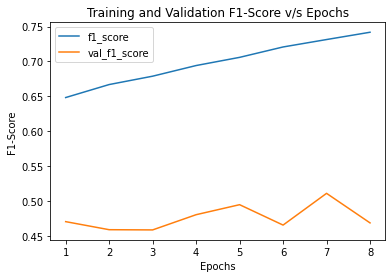

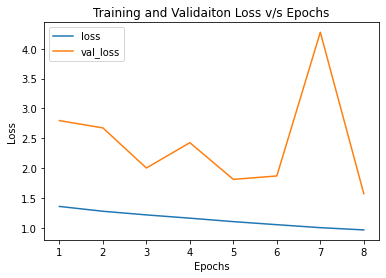

In [ ]:
my_plot(his)

#### Decreasing the learning rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-4)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 785s 558ms/step - loss: 0.8031 - f1_score: 0.7788 - categorical_accuracy: 0.7757 - val_loss: 1.3163 - val_f1_score: 0.6307 - val_categorical_accuracy: 0.6117
Epoch 2/4
1407/1407 [==============================] - 778s 553ms/step - loss: 0.8118 - f1_score: 0.7772 - categorical_accuracy: 0.7741 - val_loss: 1.6644 - val_f1_score: 0.6390 - val_categorical_accuracy: 0.6174
Epoch 3/4
1407/1407 [==============================] - 762s 542ms/step - loss: 0.8039 - f1_score: 0.7786 - categorical_accuracy: 0.7758 - val_loss: 1.3992 - val_f1_score: 0.6406 - val_categorical_accuracy: 0.6195
Epoch 4/4
1407/1407 [==============================] - 758s 538ms/step - loss: 0.8018 - f1_score: 0.7795 - categorical_accuracy: 0.7777 - val_loss: 2.0463 - val_f1_score: 0.6394 - val_categorical_accuracy: 0.6197


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/MobileNetV2_3_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

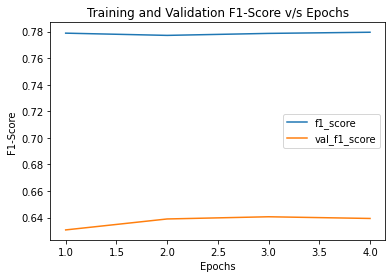

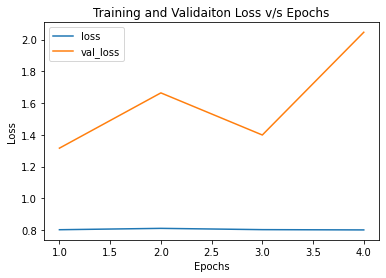

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 763s 542ms/step - loss: 0.8024 - f1_score: 0.7788 - categorical_accuracy: 0.7757 - val_loss: 2.0415 - val_f1_score: 0.6401 - val_categorical_accuracy: 0.6206
Epoch 2/4
1407/1407 [==============================] - 761s 541ms/step - loss: 0.7992 - f1_score: 0.7803 - categorical_accuracy: 0.7777 - val_loss: 1.3196 - val_f1_score: 0.6409 - val_categorical_accuracy: 0.6215
Epoch 3/4
1407/1407 [==============================] - 754s 536ms/step - loss: 0.7967 - f1_score: 0.7804 - categorical_accuracy: 0.7776 - val_loss: 1.7722 - val_f1_score: 0.6406 - val_categorical_accuracy: 0.6218
Epoch 4/4
1407/1407 [==============================] - 761s 541ms/step - loss: 0.7938 - f1_score: 0.7822 - categorical_accuracy: 0.7786 - val_loss: 2.5375 - val_f1_score: 0.6407 - val_categorical_accuracy: 0.6204


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/MobileNetV2_4_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

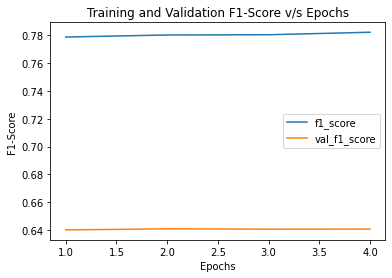

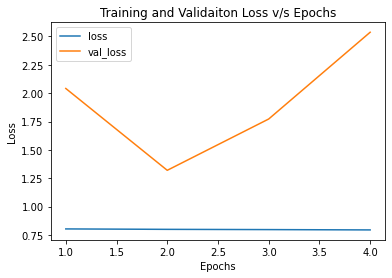

In [ ]:
my_plot(his)

#### Loading the model

In [ ]:
model = load_model("/content/drive/My Drive/Internship Project/Models/MobileNetV2_4_epochs4.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})

### Fine-Tuning

#### Freezing all layers except the last Convolution Block

In [ ]:
set_trainable = False
for layer in model.layers:
  if layer.name == 'block_16_expand':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

#### Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(learning_rate=1e-4), metrics=[f1_score, categorical_accuracy])

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=400, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
400/400 [==============================] - 941s 2s/step - loss: 0.7048 - f1_score: 0.8073 - categorical_accuracy: 0.8015 - val_loss: 1.3346 - val_f1_score: 0.6553 - val_categorical_accuracy: 0.6364
Epoch 2/4
400/400 [==============================] - 922s 2s/step - loss: 0.7043 - f1_score: 0.8096 - categorical_accuracy: 0.8038 - val_loss: 2.3650 - val_f1_score: 0.6546 - val_categorical_accuracy: 0.6354
Epoch 3/4
400/400 [==============================] - 912s 2s/step - loss: 0.7106 - f1_score: 0.8063 - categorical_accuracy: 0.8002 - val_loss: 1.9359 - val_f1_score: 0.6551 - val_categorical_accuracy: 0.6366
Epoch 4/4
400/400 [==============================] - 904s 2s/step - loss: 0.7103 - f1_score: 0.8061 - categorical_accuracy: 0.7995 - val_loss: 1.9308 - val_f1_score: 0.6552 - val_categorical_accuracy: 0.6356


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/MobileNetV2_5_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

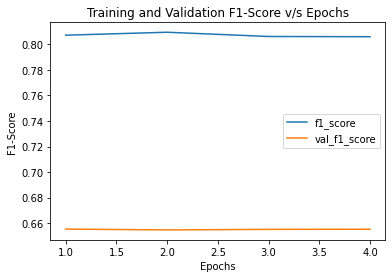

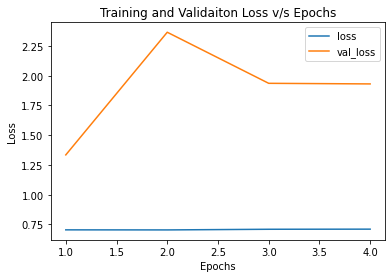

In [ ]:
my_plot(his)

# Transfer Learning using DenseNet201 ImageNet Weights
*    Size of each image = (128, 128)
*    Batch size = 64
*    Epochs = 26

#### Importing the convolutional base and creating the model

In [ ]:
from keras.applications import DenseNet201
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adadelta


base_model = DenseNet201(include_top=False, weights="imagenet", input_shape=(128,128,3))
h = base_model.output
h = GlobalAveragePooling2D()(h)
output = Dense(units=200, activation="softmax")(h)

model = Model(inputs=[base_model.input], outputs=[output])

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=[f1_score, categorical_accuracy])
model.summary()

74842112/74836368 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
___________________________

#### Loading Validation Data

In [ ]:
# For Validation Data
validation_data_generator = validation_datagen.flow_from_dataframe(validation_data, directory='val/images', x_col='FileName', y_col='Class', target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=10)

Found 10000 validated image filenames belonging to 200 classes.


#### Loading Augmented Images

Found 90000 images belonging to 200 classes.


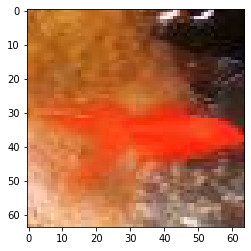

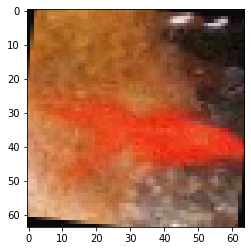

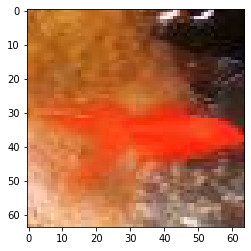

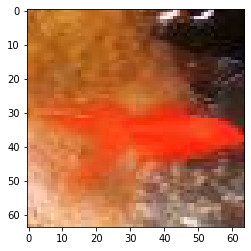

In [ ]:
# Using Image Augmentation 2
image_augmentation2()
display_some_augmented_images()

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=400, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
400/400 [==============================] - 890s 2s/step - loss: 3.8564 - f1_score: 0.1024 - categorical_accuracy: 0.1747 - val_loss: 3.2780 - val_f1_score: 0.2292 - val_categorical_accuracy: 0.2605
Epoch 2/4
400/400 [==============================] - 770s 2s/step - loss: 2.8137 - f1_score: 0.2742 - categorical_accuracy: 0.3395 - val_loss: 4.9444 - val_f1_score: 0.2934 - val_categorical_accuracy: 0.3098
Epoch 3/4
400/400 [==============================] - 760s 2s/step - loss: 2.5553 - f1_score: 0.3422 - categorical_accuracy: 0.3912 - val_loss: 2.9525 - val_f1_score: 0.2958 - val_categorical_accuracy: 0.3148
Epoch 4/4
400/400 [==============================] - 769s 2s/step - loss: 2.2713 - f1_score: 0.4119 - categorical_accuracy: 0.4493 - val_loss: 2.9322 - val_f1_score: 0.3883 - val_categorical_accuracy: 0.3864


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_1_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

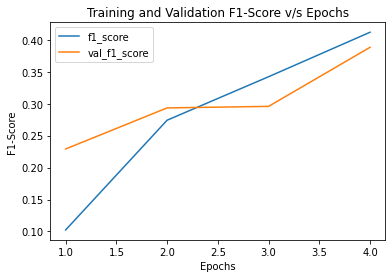

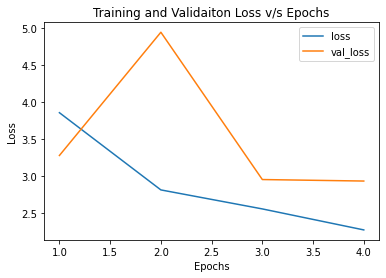

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=400, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
400/400 [==============================] - 762s 2s/step - loss: 2.0819 - f1_score: 0.4630 - categorical_accuracy: 0.4874 - val_loss: 1.9389 - val_f1_score: 0.4762 - val_categorical_accuracy: 0.4675
Epoch 2/4
400/400 [==============================] - 763s 2s/step - loss: 2.0425 - f1_score: 0.4791 - categorical_accuracy: 0.4955 - val_loss: 2.1287 - val_f1_score: 0.4653 - val_categorical_accuracy: 0.4626
Epoch 3/4
400/400 [==============================] - 768s 2s/step - loss: 2.0010 - f1_score: 0.4874 - categorical_accuracy: 0.5031 - val_loss: 2.7383 - val_f1_score: 0.4826 - val_categorical_accuracy: 0.4732
Epoch 4/4
400/400 [==============================] - 758s 2s/step - loss: 1.8498 - f1_score: 0.5293 - categorical_accuracy: 0.5354 - val_loss: 1.9524 - val_f1_score: 0.5104 - val_categorical_accuracy: 0.5111


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_2_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

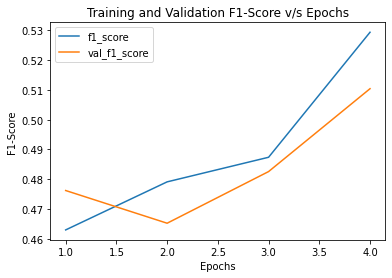

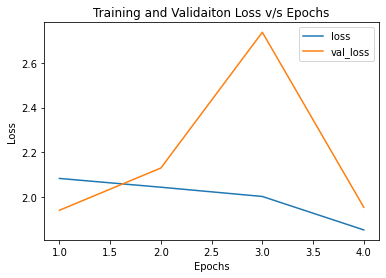

In [ ]:
my_plot(his)

#### Decreasing learning rate

In [ ]:
K.set_value(model.optimizer.lr, 1e-4)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=400, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
400/400 [==============================] - 766s 2s/step - loss: 1.6537 - f1_score: 0.5712 - categorical_accuracy: 0.5769 - val_loss: 1.4003 - val_f1_score: 0.5718 - val_categorical_accuracy: 0.5675
Epoch 2/4
400/400 [==============================] - 765s 2s/step - loss: 1.6433 - f1_score: 0.5711 - categorical_accuracy: 0.5807 - val_loss: 1.3074 - val_f1_score: 0.5745 - val_categorical_accuracy: 0.5698
Epoch 3/4
400/400 [==============================] - 759s 2s/step - loss: 1.6200 - f1_score: 0.5768 - categorical_accuracy: 0.5882 - val_loss: 2.4057 - val_f1_score: 0.5742 - val_categorical_accuracy: 0.5693
Epoch 4/4
400/400 [==============================] - 767s 2s/step - loss: 1.6488 - f1_score: 0.5711 - categorical_accuracy: 0.5834 - val_loss: 1.7445 - val_f1_score: 0.5731 - val_categorical_accuracy: 0.5686


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_3_epochs4.h5")

#### Plotting F1-Score and Loss v/s Epochs

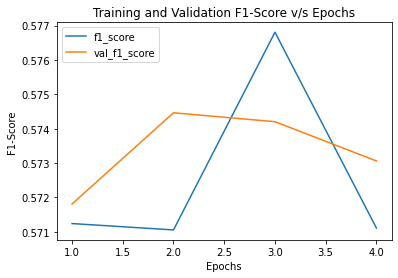

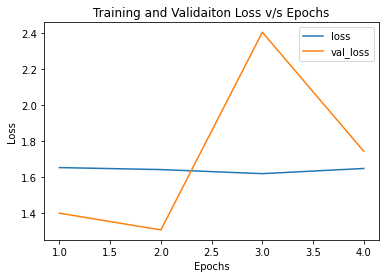

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=2, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/2
1407/1407 [==============================] - 2521s 2s/step - loss: 1.6376 - f1_score: 0.5725 - categorical_accuracy: 0.5826 - val_loss: 1.3678 - val_f1_score: 0.5777 - val_categorical_accuracy: 0.5714
Epoch 2/2
1407/1407 [==============================] - 2516s 2s/step - loss: 1.6261 - f1_score: 0.5770 - categorical_accuracy: 0.5845 - val_loss: 1.5088 - val_f1_score: 0.5794 - val_categorical_accuracy: 0.5750


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_4_epochs2.h5")

#### Plotting F1-Score and Loss v/s Epochs

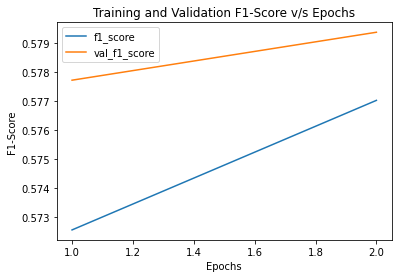

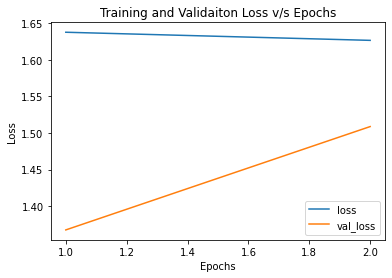

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=2, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/2
1407/1407 [==============================] - 2528s 2s/step - loss: 1.5915 - f1_score: 0.5851 - categorical_accuracy: 0.5942 - val_loss: 1.7061 - val_f1_score: 0.5940 - val_categorical_accuracy: 0.5879
Epoch 2/2
1407/1407 [==============================] - 2522s 2s/step - loss: 1.5390 - f1_score: 0.6002 - categorical_accuracy: 0.6080 - val_loss: 1.6332 - val_f1_score: 0.6043 - val_categorical_accuracy: 0.5972


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_5_epochs2.h5")

#### Plotting F1-Score and Loss v/s Epochs

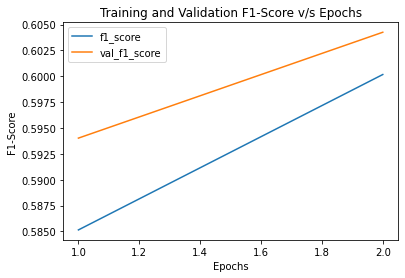

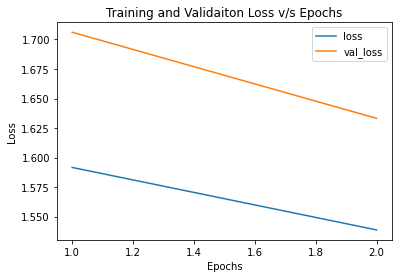

In [ ]:
my_plot(his)

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=1, steps_per_epoch=200, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/1
200/200 [==============================] - 6067s 30s/step - loss: 1.5311 - f1_score: 0.6045 - categorical_accuracy: 0.6125 - val_loss: 1.9447 - val_f1_score: 0.6041 - val_categorical_accuracy: 0.5980


In [ ]:
his = model.fit_generator(training_data_generator, epochs=1, steps_per_epoch=200, validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/1
200/200 [==============================] - 6157s 31s/step - loss: 1.5191 - f1_score: 0.6055 - categorical_accuracy: 0.6137 - val_loss: 1.7622 - val_f1_score: 0.6056 - val_categorical_accuracy: 0.5993


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_6_epochs2.h5")

#### Training

In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 2637s 2s/step - loss: 1.4819 - f1_score: 0.6135 - categorical_accuracy: 0.6214 - val_loss: 1.9073 - val_f1_score: 0.6128 - val_categorical_accuracy: 0.6049
Epoch 2/4
1407/1407 [==============================] - 2509s 2s/step - loss: 1.4336 - f1_score: 0.6266 - categorical_accuracy: 0.6352 - val_loss: 1.7370 - val_f1_score: 0.6188 - val_categorical_accuracy: 0.6093
Epoch 3/4
1407/1407 [==============================] - 2493s 2s/step - loss: 1.4276 - f1_score: 0.6279 - categorical_accuracy: 0.6351 - val_loss: 1.3144 - val_f1_score: 0.6216 - val_categorical_accuracy: 0.6154
Epoch 4/4
1407/1407 [==============================] - 2513s 2s/step - loss: 1.4094 - f1_score: 0.6332 - categorical_accuracy: 0.6376 - val_loss: 2.0288 - val_f1_score: 0.6268 - val_categorical_accuracy: 0.6198


In [ ]:
his = model.fit_generator(training_data_generator, epochs=4, steps_per_epoch=len(training_data_generator), validation_steps=len(validation_data_generator), validation_data=validation_data_generator, verbose=1)

Epoch 1/4
1407/1407 [==============================] - 2510s 2s/step - loss: 1.4000 - f1_score: 0.6353 - categorical_accuracy: 0.6419 - val_loss: 1.0301 - val_f1_score: 0.6276 - val_categorical_accuracy: 0.6204
Epoch 2/4
1407/1407 [==============================] - 2519s 2s/step - loss: 1.4001 - f1_score: 0.6366 - categorical_accuracy: 0.6418 - val_loss: 1.3012 - val_f1_score: 0.6290 - val_categorical_accuracy: 0.6198
Epoch 3/4
1407/1407 [==============================] - 2526s 2s/step - loss: 1.3961 - f1_score: 0.6367 - categorical_accuracy: 0.6427 - val_loss: 1.7881 - val_f1_score: 0.6287 - val_categorical_accuracy: 0.6212
Epoch 4/4
1407/1407 [==============================] - 2529s 2s/step - loss: 1.3959 - f1_score: 0.6362 - categorical_accuracy: 0.6428 - val_loss: 1.6528 - val_f1_score: 0.6292 - val_categorical_accuracy: 0.6200


#### Saving the model

In [ ]:
model.save("/content/drive/My Drive/Internship Project/Models/DenseNet_7_epochs8.h5")

#### Plotting F1-Score and Loss v/s Epochs

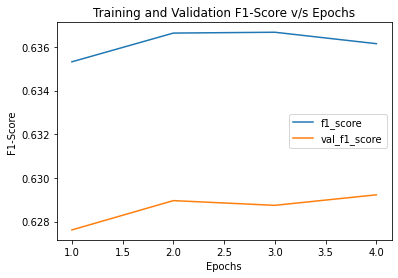

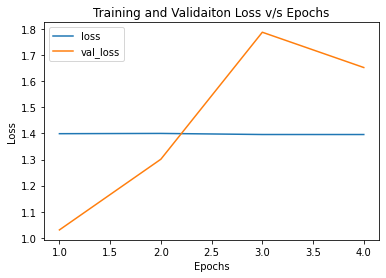

In [ ]:
my_plot(his)

# Model Ensembling

#### Importing all the models

In [ ]:
model1 = load_model("/content/drive/My Drive/Internship Project/Models/model_9_epochs8.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})
model2 = load_model("/content/drive/My Drive/Internship Project/Models/Xception_2_epochs4.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})
model3 = load_model("/content/drive/My Drive/Internship Project/Models/InceptionResNetV2_3_epochs4.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})
model4 = load_model("/content/drive/My Drive/Internship Project/Models/MobileNetV2_5_epochs4.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})
model5 = load_model("/content/drive/My Drive/Internship Project/Models/DenseNet_7_epochs8.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})

model1.name = "model_from_scratch"
model2.name = "xception"
model3.name = "inceptionresnetv2"
model4.name = "mobilenetv2"
model5.name = "densenet201"

#### Averaging them

In [ ]:
def ensemble_models(models, model_input):
  yhat = [model(model_input) for model in models]
  yavg = Average()(yhat)
  model_ens = Model(inputs=model_input, outputs=yavg, name='ensembled_model')
  return model_ens

models = [model1, model2, model3, model4, model5]
model_input = Input(shape=(128, 128, 3))
model_ens = ensemble_models(models, model_input)
model_ens.summary()

Model: "ensembled_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
model_from_scratch (Model)      (None, 200)          50490376    input_1[0][0]                    
__________________________________________________________________________________________________
xception (Model)                (None, 200)          21271280    input_1[0][0]                    
__________________________________________________________________________________________________
inceptionresnetv2 (Model)       (None, 200)          54644136    input_1[0][0]                    
____________________________________________________________________________________

#### Saving the model

In [ ]:
model_ens.save("/content/drive/My Drive/Internship Project/Models/model_ensembled.h5")

# Predictions

#### Loading the model

In [ ]:
model = load_model("/content/drive/My Drive/Internship Project/Models/model_ensembled.h5", custom_objects={'f1_score': f1_score, 'categorical_accuracy': categorical_accuracy})

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### Loading test data and predicting the respective classes

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
testing_data_generator = test_datagen.flow_from_directory(r'test', target_size=(128,128), color_mode='rgb', batch_size=1, class_mode='categorical', shuffle=False)

predicted_classes = model.predict_generator(testing_data_generator, verbose=1).argmax(axis=-1)

Found 10000 images belonging to 1 classes.
10000/10000 [==============================] - 2278s 228ms/step


#### Forming the file containing the file_name and category

In [ ]:
label_map = (training_data_generator.class_indices)
test_result = open("TestResult.txt", "w")


label_map_keys = list(label_map.keys())
label_map_values = list(label_map.values())

print("file_name,category", file=test_result)

for i in range(len(predicted_classes)):
    file_name = testing_data_generator.filenames[i].strip('images/')
    class_id = label_map_keys[label_map_values.index(predicted_classes[i])]
    print(f"{file_name},{class_id}", file=test_result)

test_result.close()

# Plotting and Verifying

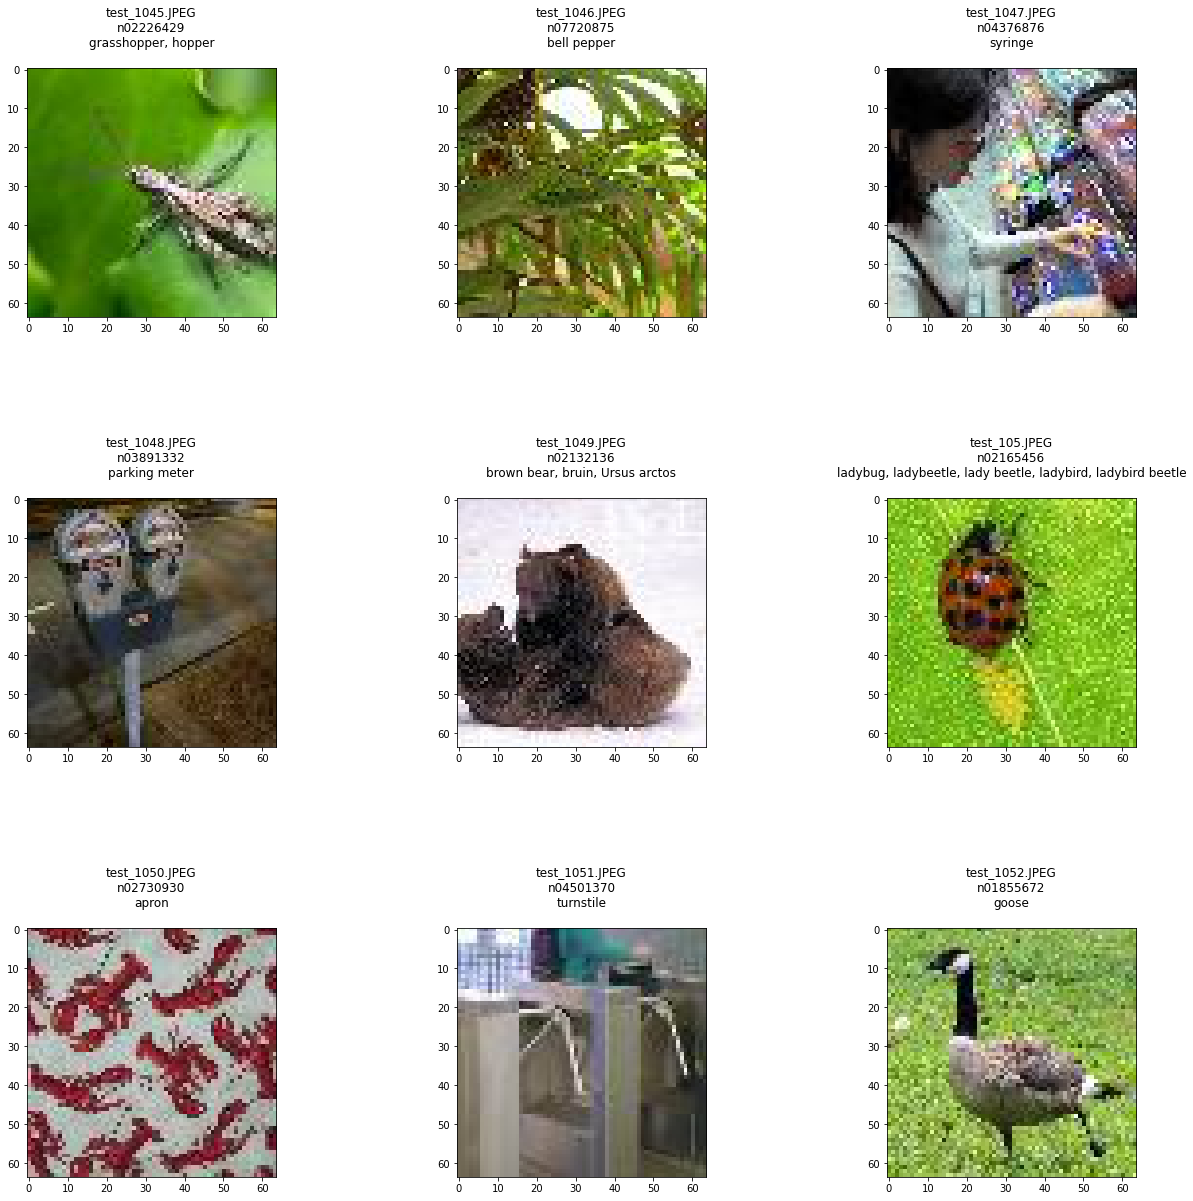

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

test_result = open("TestResult.txt", "r")
lines = test_result.readlines()

words = open("words.txt", "r")
word_lines = words.readlines()

labels = {}
for word_line in word_lines:
  class_id = word_line.split("\t")[0]
  descr = word_line.split("\t")[1]
  labels[class_id] = descr

words.close()

fig, ax = plt.subplots(3, 3, figsize=(20,20))
fig.tight_layout(pad=15.0)

index = 1

for img_num in range(54, 63):
  file_name = lines[img_num].split(",")[0]
  class_id = lines[img_num].split(",")[1].strip("\n")
  path = "test/images/{}".format(file_name)
  img = mpimg.imread(path)
  plt.subplot(3, 3, index)
  plt.imshow(img)
  plt.title("{}\n{}\n{}".format(file_name, class_id, labels[class_id]))
  index += 1
plt.figure()

test_result.close()